In [1]:
list_of_packages <- c("ggplot2", "dplyr", "tidyr", "circlize","arrow","hrbrthemes", "tm","VennDiagram")
for (package in list_of_packages) {
    suppressPackageStartupMessages(
        suppressWarnings(
            library(
                package,
                character.only = TRUE,
                quietly = TRUE,
                warn.conflicts = FALSE
            )
        )
    )
}
if (!require(devtools)) install.packages("devtools")
if (!require(ggVennDiagram)) install.packages("ggVennDiagram")
suppressPackageStartupMessages(
        suppressWarnings(library(ggVennDiagram))
)
if (!require(ggvenn)) devtools::install_github("yanlinlin82/ggvenn")
suppressPackageStartupMessages(
        suppressWarnings(library(ggvenn))
)

# Get the current working directory and find Git root
find_git_root <- function() {
    # Get current working directory
    cwd <- getwd()

    # Check if current directory has .git
    if (dir.exists(file.path(cwd, ".git"))) {
        return(cwd)
    }

    # If not, search parent directories
    current_path <- cwd
    while (dirname(current_path) != current_path) {  # While not at root
        parent_path <- dirname(current_path)
        if (dir.exists(file.path(parent_path, ".git"))) {
            return(parent_path)
        }
        current_path <- parent_path
    }

    # If no Git root found, stop with error
    stop("No Git root directory found.")
}

# Find the Git root directory
root_dir <- find_git_root()
cat("Git root directory:", root_dir, "\n")



Loading required package: devtools

Warning message:
“package ‘devtools’ was built under R version 4.2.3”
Loading required package: usethis

Warning message:
“package ‘usethis’ was built under R version 4.2.3”
Loading required package: ggVennDiagram

Warning message:
“package ‘ggVennDiagram’ was built under R version 4.2.3”

Attaching package: ‘ggVennDiagram’


The following object is masked from ‘package:tidyr’:

    unite


Loading required package: ggvenn



Git root directory: ~/Documents/GFF_3D_organoid_profiling_pipeline 


In [2]:
organoid_fs_inter_patient_drug_list_path <- file.path(
    root_dir,
    "5.EDA/results/drug_hit_lists/organoid_fs_inter_patient_drug_hit_list.parquet"
)
organoid_fs_intra_patient_drug_list_path <- file.path(
    root_dir,
    "5.EDA/results/drug_hit_lists/organoid_fs_intra_patient_drug_hit_list.parquet"
)
sc_fs_inter_patient_drug_list_path <- file.path(
    root_dir,
    "5.EDA/results/drug_hit_lists/sc_fs_inter_patient_drug_hit_list.parquet"
)
sc_fs_intra_patient_drug_list_path <- file.path(
    root_dir,
    "5.EDA/results/drug_hit_lists/sc_fs_intra_patient_drug_hit_list.parquet"
)
organoid_fs_inter_patient_drugs_df <- arrow::read_parquet(
    organoid_fs_inter_patient_drug_list_path
)
organoid_fs_intra_patient_drugs_df <- arrow::read_parquet(
    organoid_fs_intra_patient_drug_list_path
)
sc_fs_inter_patient_drugs_df <- arrow::read_parquet(
    sc_fs_inter_patient_drug_list_path
)
sc_fs_intra_patient_drugs_df <- arrow::read_parquet(
    sc_fs_intra_patient_drug_list_path
)

In [3]:
organoid_inter_drugs <- unique(organoid_fs_inter_patient_drugs_df$treatment)
organoid_intra_drugs <- unique(organoid_fs_intra_patient_drugs_df$treatment)
sc_inter_drugs <- unique(sc_fs_inter_patient_drugs_df$treatment)
sc_intra_drugs <- unique(sc_fs_intra_patient_drugs_df$treatment)
organoid_inter_drugs
organoid_intra_drugs
sc_inter_drugs
sc_intra_drugs

[1] "Staurosporine" "Onalespib"     "Digoxin"

[1] "Staurosporine" "Onalespib"     "Digoxin"       "Mirdametinib" 
[5] "Binimetinib"   "Trametinib"    "Fimepinostat"  "Selumetinib"  
[9] "Linsitinib"

[1] "Staurosporine"

[1] "Fimepinostat"  "Trametinib"    "Rapamycin"     "Staurosporine"
[5] "Digoxin"       "Binimetinib"   "Cabozantinib"  "Imatinib"

In [4]:

# Create the lists
venn_lists <- list(
    "Organoid Inter" = organoid_inter_drugs,
    "Organoid Intra" = organoid_intra_drugs,
    "SC Inter" = sc_inter_drugs,
    "SC Intra" = sc_intra_drugs
)

# Print some basic statistics
cat("Number of drugs in each category:\n")
cat("Organoid Inter:", length(organoid_inter_drugs), "\n")
cat("Organoid Intra:", length(organoid_intra_drugs), "\n")
cat("SC Inter:", length(sc_inter_drugs), "\n")
cat("SC Intra:", length(sc_intra_drugs), "\n")

# Find intersections manually
all_drugs <- unique(c(organoid_inter_drugs, organoid_intra_drugs, sc_inter_drugs, sc_intra_drugs))
cat("\nTotal unique drugs across all categories:", length(all_drugs), "\n")

# Find common drugs between organoid and single cell
organoid_all <- unique(c(organoid_inter_drugs, organoid_intra_drugs))
sc_all <- unique(c(sc_inter_drugs, sc_intra_drugs))
common_organoid_sc <- intersect(organoid_all, sc_all)
cat("Drugs common between organoid and single cell:", length(common_organoid_sc), "\n")
cat("Common drugs:", paste(common_organoid_sc, collapse = ", "), "\n")


Number of drugs in each category:
Organoid Inter: 3 
Organoid Intra: 9 
SC Inter: 1 
SC Intra: 8 

Total unique drugs across all categories: 12 


Drugs common between organoid and single cell: 5 
Common drugs: Staurosporine, Digoxin, Binimetinib, Trametinib, Fimepinostat 


png 
  2

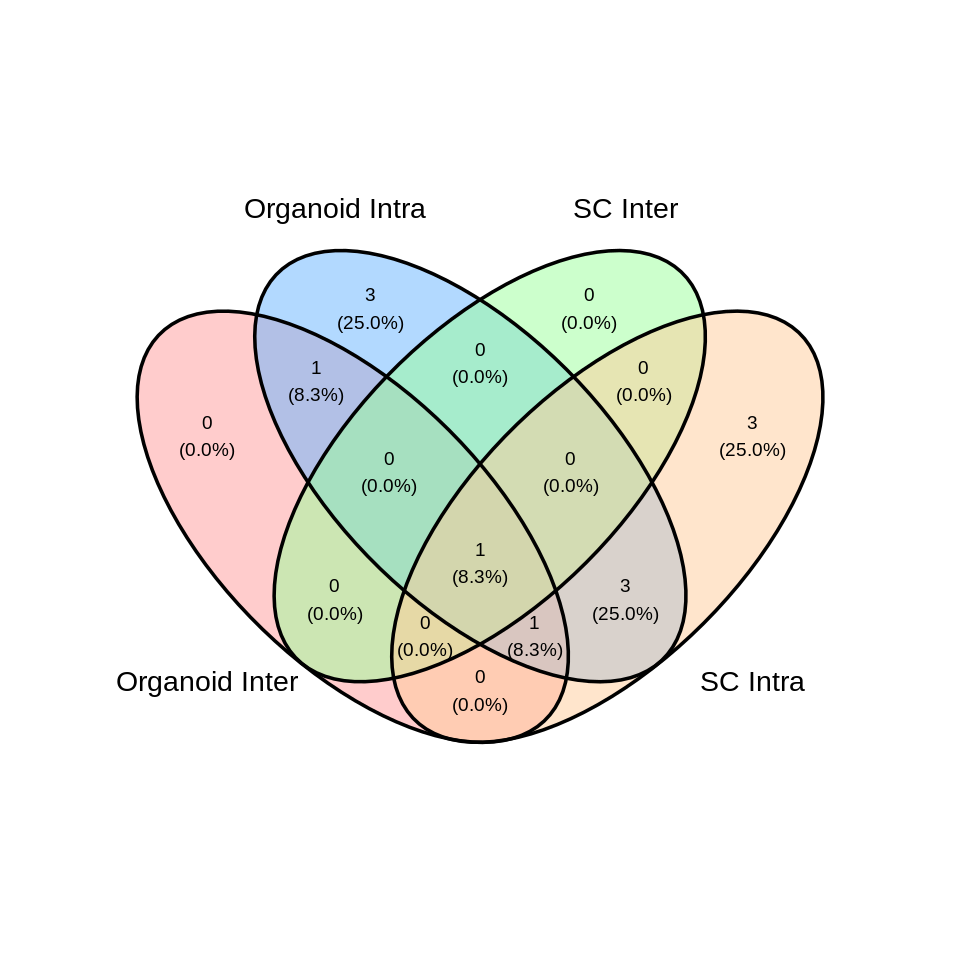

In [5]:
# plot the Venn diagram
# venn_plot <- ggVennDiagram(
width <- 8
height <- 8
options(repr.plot.width = width, repr.plot.height = height)

venn_plot <- ggvenn(
    venn_lists,
    fill_color = c("#FF9999", "#66B3FF", "#99FF99", "#FFCC99"),
)
png(
    filename = file.path(
        root_dir,
        "5.EDA/figures/venn_diagram_organoid_sc_drug_hits.png"
    ),
    width = width,
    height = height,
    res = 300,
    units = 'in'
)
venn_plot
dev.off()
venn_plot

In [6]:
# get the unique drugs in each category
organoid_inter_unique <- setdiff(organoid_inter_drugs, union(organoid_intra_drugs, union(sc_inter_drugs, sc_intra_drugs)))

just_organoid_intra <- setdiff(organoid_intra_drugs, union(organoid_inter_drugs, union(sc_inter_drugs, sc_intra_drugs)))
just_organoid_inter <- setdiff(organoid_inter_drugs, union(organoid_intra_drugs, union(sc_inter_drugs, sc_intra_drugs)))
organoid_inter_and_intra <- intersect(organoid_inter_drugs, organoid_intra_drugs)
just_sc_inter <- setdiff(sc_inter_drugs, union(organoid_inter_drugs, union(organoid_intra_drugs, sc_intra_drugs)))
just_sc_intra <- setdiff(sc_intra_drugs, union(organoid_inter_drugs, union(organoid_intra_drugs, sc_inter_drugs)))
sc_inter_and_intra <- intersect(sc_inter_drugs, sc_intra_drugs)
sc_intra_and_organoid_intra <- intersect(sc_intra_drugs, organoid_intra_drugs)
sc_intra_and_organoid_inter <- intersect(sc_intra_drugs, organoid_inter_drugs)
sc_inter_and_organoid_inter <- intersect(sc_inter_drugs, organoid_inter_drugs)
organoid_inter_and_organoid_intra_and_sc_inter <- intersect(organoid_inter_drugs, intersect(organoid_intra_drugs, sc_inter_drugs))
organoid_intra_and_sc_inter_and_sc_intra <- intersect(organoid_intra_drugs, intersect(sc_inter_drugs, sc_intra_drugs))
all_shared <- intersect(organoid_inter_drugs, intersect(organoid_intra_drugs, intersect(sc_inter_drugs, sc_intra_drugs)))
print(paste("Just Organoid Intra:", length(just_organoid_intra)))
print(paste("Just Organoid Inter:", length(just_organoid_inter)))
print(paste("Organoid Inter and Intra:", length(organoid_inter_and_intra)))
print(paste("Just SC Inter:", length(just_sc_inter)))
print(paste("Just SC Intra:", length(just_sc_intra)))
print(paste("SC Inter and Intra:", length(sc_inter_and_intra)))
print(paste("SC Intra and Organoid Intra:", length(sc_intra_and_organoid_intra)))
print(paste("SC Intra and Organoid Inter:", length(sc_intra_and_organoid_inter)))
print(paste("SC Inter and Organoid Inter:", length(sc_inter_and_organoid_inter)))
print(paste("Organoid Inter and Organoid Intra and SC Inter:", length(organoid_inter_and_organoid_intra_and_sc_inter)))
print(paste("Organoid Intra and SC Inter and SC Intra:", length(organoid_intra_and_sc_inter_and_sc_intra)))
print(paste("All shared drugs:", length(all_shared)))
all_shared

[1] "Just Organoid Intra: 3"
[1] "Just Organoid Inter: 0"
[1] "Organoid Inter and Intra: 3"
[1] "Just SC Inter: 0"
[1] "Just SC Intra: 3"
[1] "SC Inter and Intra: 1"
[1] "SC Intra and Organoid Intra: 5"
[1] "SC Intra and Organoid Inter: 2"
[1] "SC Inter and Organoid Inter: 1"
[1] "Organoid Inter and Organoid Intra and SC Inter: 1"
[1] "Organoid Intra and SC Inter and SC Intra: 1"
[1] "All shared drugs: 1"


[1] "Staurosporine"